# Pandas Test - Real life exercise

In [1]:
import pandas as pd

For visualizations:

In [2]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [3]:
#[OS] is_success True -> is_sever cannot be True

In [4]:
ad_recs_annotated = pd.read_csv('data/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
208203,2021-week_47,AD08XWS6M7,RelayFoods,IN,yes,NaN,Qality,UserPopQ
323379,2022-week_04,AD08N89MV8,Search Million Culture,IN,yes,NaN,Qality,UserPopQ
166934,2021-week_44,AD0887889J,RelayFoods,JP,yes,NaN,Qality,DNNQ
37108,2021-week_35,AD08KJ9V88,Search Million Culture,IN,yes,NaN,Qality,UserPopQ
178361,2021-week_45,AD00MFNJHO,RelayFoods,IN,yes,NaN,Qality,UserPopQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

* Add a column with the sample year **[OS]** split ww and year - ww to be used later
* Add a column with the sample quarter (google how to)
* Add a new success column with values 1 and 0 for yes and no 
* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all) - [OS] do at the end , do not do**
* Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
* Capitlize (first letter only) the is_success column

In [5]:
#to ease usage
ad = ad_recs_annotated.copy()

#### Answer1

In [8]:
####################
#1 - sample year - Add a column with the sample year [OS] split ww and year - ww to be used later
#print(ad.week_id.dtype)
ad['year'] = ad.week_id.apply(lambda x: int(x[0:4]))

In [9]:
#test
display(ad.head(2))
#try if it turned into int -> should be 2024
ad.loc[0, 'year'] +3

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021


2024

#### Answer2

In [10]:
####################
#2 - Add a column with the sample quarter (google how to)
#google: https://stackoverflow.com/questions/57548382/getting-a-number-of-quarter-from-numeric-week-number-and-the-week-number-within
##adding work week column from week_id
ad['ww'] = ad.week_id.apply(lambda x: int(x[-2:]))
#adding quarter from week number
ad['quarter'] = ((ad['ww']-1) // 13) + 1

In [11]:
#test
ad.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter
259033,2021-week_51,AD0876PWTG,Fry Multimedia,DE,no,True,Qality,DNNQ,2021,51,4
53515,2021-week_36,AD0888TR86,Extreme DA,US,no,False,Yield,UserPopY,2021,36,3
206239,2021-week_47,AD09H8GJV8,Search Million Culture,GB,yes,NaN,Qality,DNNQ,2021,47,4
6757,2021-week_33,AD06Y689WC,Search Million Culture,IN,yes,NaN,Qality,ManualQ,2021,33,3
281533,2022-week_01,AD07H88SPL,RelayFoods,JP,yes,NaN,Qality,DNNQ,2022,1,1


#### Answer3

In [14]:
#####################
#3 - Add a new success column with values 1 and 0 for yes and no
print(ad.is_success.unique())
ad['success'] = ad.is_success.apply(lambda x: 1 if x=='yes' else 0)

['yes' 'no']


In [15]:
#test
ad[ad.is_success == 'yes'].sample(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success
259185,2021-week_51,AD00JRWY8C,RelayFoods,DE,yes,NaN,Qality,DNNQ,2021,51,4,1


In [16]:
ad[ad.is_success == 'no'].sample(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success
63969,2021-week_37,AD098NGDNM,Puentes Company,IN,no,False,Yield,UserPopY,2021,37,3,0


#### Answer4

In [17]:
##########################
#4 - Are there any NaNs in the is_sever column? 
#    Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs.
print(ad.shape)
print(ad.is_sever.isna().sum()) # Yes, 304195 cases. for opposite - notnull() is not null values
ad['severity'] = ad['is_sever'].fillna(False)

(373788, 12)
304195


In [20]:
#test
print(ad[ad.is_sever.isna()].sample(1))
print(ad.severity.isna().sum()) #no NaN -> returns 0

             week_id       ad_id   requester region is_success is_sever  \
167630  2021-week_44  AD08M9IGOQ  RelayFoods     JP        yes      NaN   

       recommendation_type rec_provider  year  ww  quarter  success  severity  
167630              Qality         DNNQ  2021  44        4        1     False  
0


In [21]:
#another way of checking NaN -> must include dropna=False
ad.is_sever.value_counts(dropna=False)

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

#### Answer5

In [22]:
######################
#5 - Capitlize (first letter only) the is_success column
ad['is_success'] = ad.is_success.apply(str.capitalize)

In [23]:
#test
ad.sample(2)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success,severity
41939,2021-week_35,AD0008DH8M,Fancy,US,No,True,Qality,DNNQ,2021,35,3,0,True
244570,2021-week_50,AD078GNWLY,RelayFoods,DE,Yes,NaN,Qality,UserPopQ,2021,50,4,1,False


### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) **and** the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DDNQ, RRNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

#### Answer1

In [24]:
#######################
#1 - How many requests are there in US region?
#ad.region.value_counts().loc['US'] #another way
ad[ad.region == 'US'].region.count()

103846

In [26]:
#using query
ad.query('region == "US"').region.shape

(103846,)

#### Answer2

In [27]:
######################
#2 - How many successful requests are there in US region?
ad[(ad.region == 'US') & (ad.success == 1)].success.count()

88918

In [28]:
#using query
ad.query('region == "US" and success == 1').success.shape

(88918,)

#### Answer3

In [29]:
#######################
#3 - How many successful requests are there in US region, on week 52?
ad[(ad.region == 'US') & (ad.success == 1) & (ad.ww == 52)].success.count()

3342

In [30]:
#query
ad.query('region == "US" and success == 1 & ww == 52').success.shape #accepts 'and' or '&'

(3342,)

#### Answer4

In [31]:
#######################
#4 - How many requests where delivered by DDNQ, RRNY and UserPopQ together?
ad[(ad.rec_provider == 'DDNQ') | (ad.rec_provider == 'RRNY') | (ad.rec_provider == 'UserPopQ')].rec_provider.count()

69937

In [32]:
#query
ad.query("rec_provider == 'DDNQ' or rec_provider == 'RRNY' or rec_provider == 'UserPopQ'").rec_provider.shape

(69937,)

#### Answer5

In [168]:
#######################
#5 - How many requests where delivered by rule based providers?
ad.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

In [169]:
ad[(ad.rec_provider == 'RuleBasedY') | (ad.rec_provider == 'RuleBased')].rec_provider.count()

28336

In [33]:
#query + contains
ad.query('rec_provider.str.contains("RuleBased")', engine="python").rec_provider.shape

(28336,)

#### Answer6

In [34]:
#6 - Select only the requests from 2021 - How many are there? 
ad.year[ad.year == 2021].count()

271615

In [35]:
#query
ad.query('year == 2021').year.shape

(271615,)

#### Answer7

In [38]:
#7 - Select the reqeusts from week 30 to week 40 - How many are there? 
#assuming incuding 30 and including 40
ad.ww[(ad.ww > 29) & (ad.ww < 41)].shape

(115051,)

In [37]:
ad.query('ww > 29 and ww < 41').ww.count()

115051

#### Answer8

In [68]:
#8 - Select all the data that comes from the most popular Ad
#ad.head(1)
common_ad = ad['ad_id'].value_counts().idxmax()
#ad[ad.ad_id == common_ad].sample(1)
ad[ad.ad_id == common_ad].shape 

(247, 13)

In [69]:
#query
ad.query('ad_id == @common_ad').shape 

(247, 13)

#### Answer9

In [70]:
#########################
#9 - Select all the data that comes from the least popular provider
least_prov = ad['rec_provider'].value_counts().idxmin() 
#ad[ad.rec_provider == least_prov].sample(1) #remove .sample(1) to get all 21 rows
ad[ad.rec_provider == least_prov].shape

(21, 13)

In [71]:
#query
ad.query('rec_provider == @least_prov').shape

(21, 13)

#### Answer10

In [72]:
#########################
#10 - Select the data in which is_sever is None. How big is it?
ad.is_sever.value_counts(dropna=False) #304195

NaN      304195
True      44689
False     24904
Name: is_sever, dtype: int64

In [73]:
ad[ad.is_sever.isna()].shape

(304195, 13)

In [74]:
ad.query('is_sever != is_sever').shape

(304195, 13)

#### Answer11

In [75]:
#############################
#11 - Select the data in which the requester is a 3 word company
req_word_len = ad.requester.apply(lambda x: len(x.split()))
#ad[req_word_len == 3].sample(1) # remove .sample(1) to get all 118141 rows
ad[req_word_len == 3].shape

(118141, 13)

In [76]:
#query
ad.query('@req_word_len == 3').shape

(118141, 13)

#### Answer12

In [78]:
#############################
#12 - Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
ad_id_has_6 = ad.ad_id.apply(lambda x: '6' in x)
#ad[(req_word_len == 3) & (ad_id_has_6)].sample(1) # remove .sample(1) to get all 24197 rows  
ad[(req_word_len == 3) & (ad_id_has_6)].shape

(24197, 13)

In [79]:
#query
ad.query('@req_word_len == 3 and @ad_id_has_6').shape

(24197, 13)

#### Answer13

In [81]:
#############################
#13 - Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
#utility func to get product of digits in a string
def mult_fr_str(in_str):
    dig_lst = [char for char in in_str if char.isdigit()]   #list of digits (still char)
    dig_mult = 1
    for i in dig_lst:
        dig_mult *= int(i)   #mult all list members after casting to int
    return dig_mult          #return product of mult
#mult_fr_str('AD07PW7PV6'), mult_fr_str('AD17PW7PV6')     
ad_id_over_30 = ad.ad_id.apply(lambda x: mult_fr_str(x) > 30)   #used utility func defined above
#ad[(req_word_len == 3) & (ad_id_over_30)].sample(1)             # remove .sample(1) to get all 983 rows     
ad[(req_word_len == 3) & (ad_id_over_30)].shape

(983, 13)

In [82]:
#query
ad.query('@req_word_len == 3 and @ad_id_over_30').shape

(983, 13)

### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

#### Answer1

In [83]:
###########################
#1 - How many weeks available in the data? Are there any missing weeks?
def missing_wws(wws):
    year_wws = set(range(1,53))
    avail_wws = set(wws) #the available weeks
    print(f'num of available weeks: {len(avail_wws)}')
    miss_wws = year_wws - avail_wws #set of missing weeks
    print(f'num of missing weeks: {len(miss_wws)} ;  weeks: {miss_wws}')
    #print(len(miss_wws))
missing_wws(ad.ww.unique())

num of available weeks: 26
num of missing weeks: 26 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}


#### Answer2

In [84]:
###########################
#2 - How many regions available in the data? Are there any missing weeks per region?
print(ad.region.unique())
print(len(ad.region.unique())) # 5 regions

['DE' 'GB' 'IN' 'JP' 'US']
5


In [85]:
#using the func defined above (question #1) missing_wws
regions_ww = ad.groupby(by='region').ww.unique().apply(missing_wws)
#we can see JP is missing also ww51 compared to others

num of available weeks: 26
num of missing weeks: 26 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
num of available weeks: 26
num of missing weeks: 26 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
num of available weeks: 26
num of missing weeks: 26 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}
num of available weeks: 25
num of missing weeks: 27 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 51}
num of available weeks: 26
num of missing weeks: 26 ;  weeks: {7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32}


#### Answer3

In [86]:
############################
#3 - How many ads are being sent to annotation in each region per week?
ad.groupby(by=['region', 'ww']).ad_id.count()

region  ww
DE      1     2402
        2     2394
        3     2378
        4     2365
        5     2382
              ... 
US      48    4010
        49    3994
        50    3991
        51    3996
        52    3998
Name: ad_id, Length: 129, dtype: int64

#### Answer4

In [192]:
########################################
#4 - How many None values are there in is_sever column?
ad.is_sever.isna().sum()

304195

#### Answer5

In [87]:
########################################
#5 - Are ads being sent more than one time in a given week? 
#what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
ad_id_num_ww = ad.groupby(by=['ad_id', 'ww']).week_id.count()
ad_id_num_ww[ad_id_num_ww.apply(lambda x: x>1)].count() #Yes, there are 9176 ads being sent more than once in a given week

9176

In [89]:
#ad_id_num_ww.sample(5)
idx = ad_id_num_ww.idxmax() #multiIndex so we get a tuple (ad_id, ww)
mx = ad_id_num_ww.max()
print(f'ad {idx[0]} was sent {mx} times in week {idx[1]}')

ad AD098SWYF6 was sent 81 times in week 40


#### Answer6

In [90]:
#########################################
#6 Are there ads that are being sent in more than one week?
#ad.ad_id.nunique() #300727 unique ads
ad_unique_ww = ad.groupby(by='ad_id').ww.nunique() #nunique=num of weeks > 1 means it is more than 1 week
ad_unique_ww.apply(lambda x: x>1).value_counts()   #yes, 31441 cases

False    269286
True      31441
Name: ww, dtype: int64

In [91]:
#6A most amount of weeks
# A - Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
idx = ad_unique_ww.idxmax()
mx = ad_unique_ww.max()
print(f'ad {idx} was sent in {mx} different weeks')
#used above df ad_unique_ww: groupby ad_id -> ww.nunique=num of weeks. check for the max (most number of weeks)

#6B the weeks:
# B - What are the weeks that the ad from above was sent in?
print(ad[ad.ad_id == idx].ww.unique()) #find where ad_id equals idx and use unique method

ad AD079VP6DH was sent in 26 different weeks
[33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51  1  2  3  4  5
  6 52]


In [92]:
#6C succsefull in one week, but not succesfful in a different week
# C - Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
#ad.groupby(by=['ad_id']).nunique().query('ww > 1 and success > 1') #5337 cases of more than one success and more than one ww
print(ad.groupby(by=['ad_id']).nunique().query('ww > 1 and success > 1').requester.size)
ad.groupby(by=['ad_id']).nunique().query('ww > 1 and success > 1').head(1)

5337


,week_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success,severity
ad_id,,,,,,,,,,,,
AD00006IDK,2,2,2,2,1,2,2,1,2,2,2,2


In [93]:
ad.loc[ad.ad_id == 'AD00006IDK'] #example of one ad

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,year,ww,quarter,success,severity
10424,2021-week_33,AD00006IDK,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,33,3,1,False
188039,2021-week_46,AD00006IDK,RelayFoods,DE,No,True,Qality,DNNQ,2021,46,4,0,True


#### Answer7

In [102]:
###############################
#7 - When is_sever is None, what is the number of successful requests? 
#What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place?
print(ad.is_sever.unique()), print() #array([nan, True, False], dtype=object)
print(ad.groupby(by=['is_sever', 'success'], dropna=False).is_success.count())
#304195 cases which is_sever is NaN: 6 cases NOT successful and 304189 successful
#looking at the output: seems that 99% when is_sever is NaN, success is "1" - so we can assume when there was success (==1)
#there is no point in listing if it was a severe defect (since it is not relevant as it was successful)

[nan True False]

is_sever  success
False     0           24899
          1               5
True      0           44677
          1              12
NaN       0               6
          1          304189
Name: is_success, dtype: int64


In [103]:
print('is_server is None + not successful')
print(ad.query('is_sever != is_sever and success==0').success.count())
print('is_server is None + successful')
print(ad.query('is_sever != is_sever and success==1').success.count())

is_server is None + not successful
6
is_server is None + successful
304189


#### Answer8

In [129]:
###############################
#8 - Per each region, What is the Quality/Yield traffic proportion WoW?
p = pd.DataFrame(ad.groupby(by=['region', 'ww', 'recommendation_type'], dropna=False).success.count().reset_index())
p['proportion'] = p.groupby(by=['region', 'ww'])['success'].apply(lambda x: x.astype(float)/x.sum())
p.head(4)
#Ido's note -> WoW, week over week both proportions (can also plot bar stocked)

,region,ww,recommendation_type,success,proportion
0,DE,1,Qality,2026,0.843464
1,DE,1,Yield,376,0.156536
2,DE,2,Qality,2027,0.846700
3,DE,2,Yield,367,0.153300


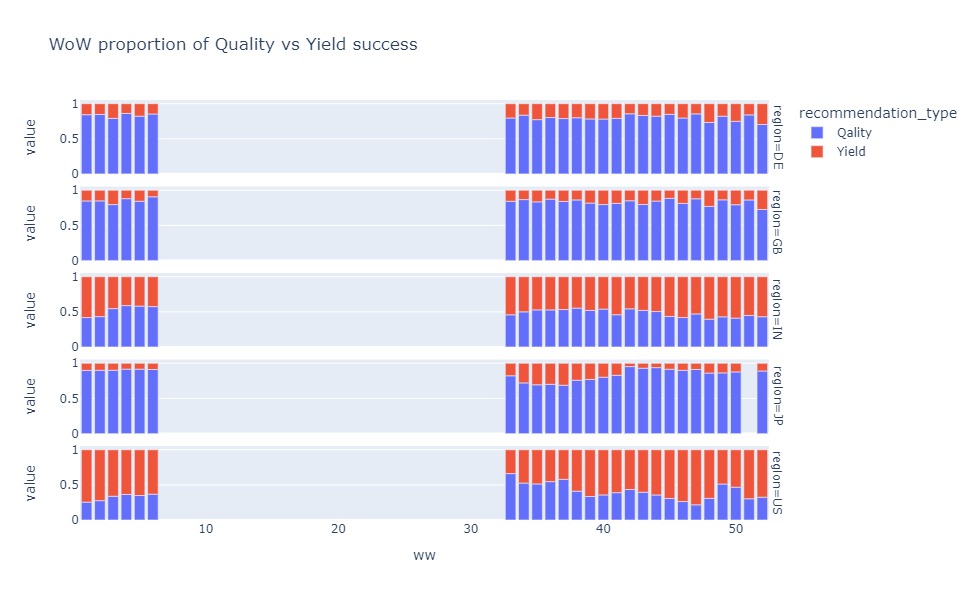

In [128]:
fig = px.bar(p, x="ww", y=["proportion"], color= 'recommendation_type', facet_row="region",
             #facet_row_spacing=0.25,
             #width = 500, 
             height = 600,
             title="WoW proportion of Quality vs Yield success")
fig.show()

In [465]:
#Omit...
#another understanding:WoW -> week over Week : proportion = quality/yield
ad.groupby(by=['region', 'ww']).recommendation_type.value_counts().unstack().apply(lambda row:row['Qality']/row['Yield'], axis=1)

region  ww
DE      1     5.388298
        2     5.523161
        3     3.784708
        4     6.232416
        5     4.631206
                ...   
US      48    0.446087
        49    1.051361
        50    0.877234
        51    0.433286
        52    0.481289
Length: 129, dtype: float64

#### Answer9

In [104]:
#############################
#9 - How many different requesters are there?
ad.requester.nunique()

36

#### Answer10

In [132]:
#############################
#10 - Which are the top 5 requesters per region?
#ad.groupby(by=['region', 'requester'], dropna=False).success.count().reset_index().sort_values(['region','success'],ascending=[False,False])
df = ad.groupby(by=['region', 'requester'], dropna=False).success.count().to_frame().unstack(['region'])
for col in df.columns:
    print(str(col[1]))
    print(df.sort_values([col], ascending=False).nlargest(n=5, columns=[col], keep='all').index)

DE
Index(['Search Million Culture', 'RelayFoods', 'MoJoe Brewing Company',
       'iDreamsky Technology', 'SOLOMO365'],
      dtype='object', name='requester')
GB
Index(['Search Million Culture', 'RelayFoods', 'Fancy',
       'MoJoe Brewing Company', 'iDreamsky Technology'],
      dtype='object', name='requester')
IN
Index(['Puentes Company', 'Search Million Culture', 'RelayFoods',
       'MoJoe Brewing Company', 'iDreamsky Technology'],
      dtype='object', name='requester')
JP
Index(['RelayFoods', 'Search Million Culture', 'MoJoe Brewing Company',
       'LocalVox Media', 'Tab Solutions'],
      dtype='object', name='requester')
US
Index(['Extreme DA', 'Fancy', 'Tab Solutions', 'Search Million Culture',
       'Sensor Tower'],
      dtype='object', name='requester')


In [134]:
############################# Omit...
# NOT elegent coding - but used it to test above pandas cleaner implementation
#utility function - assumes receving a df grouped by region and requester with success count
# prints the 5(n) top count per region
def max_req(r, regions, n=5):
    df = r.copy()
    for reg in regions:
        print(f'-----{reg}-----')
        for i in range(n):
            mxindx = df.success[df.region == reg].idxmax()
            print(df.iloc[mxindx].requester, df.iloc[mxindx].success)
            df.iloc[mxindx, df.columns.get_loc('success')] = 0

r = ad.groupby(by=['region', 'requester'], dropna=False).success.count().reset_index()
max_req(r, r.region.unique())

-----DE-----
Search Million Culture 23657
RelayFoods 17313
MoJoe Brewing Company 8616
iDreamsky Technology 3542
SOLOMO365 2435
-----GB-----
Search Million Culture 28002
RelayFoods 15920
Fancy 13678
MoJoe Brewing Company 9530
iDreamsky Technology 3919
-----IN-----
Puentes Company 29427
Search Million Culture 21365
RelayFoods 17352
MoJoe Brewing Company 7191
iDreamsky Technology 1995
-----JP-----
RelayFoods 24574
Search Million Culture 7906
MoJoe Brewing Company 3549
LocalVox Media 1724
Tab Solutions 1366
-----US-----
Extreme DA 57215
Fancy 18668
Tab Solutions 9790
Search Million Culture 5610
Sensor Tower 3503


#### Answer11

In [135]:
##################################
# 11 - Which are the different rec_proivders?
ad.rec_provider.unique()

array(['DNNQ', 'DNNY', 'BooksQ', 'UserPopQ', 'UserPopY', 'RuleBasedY',
       'ManualY', 'ManualQ', 'BooksY', 'XGBQ', 'XGBY', 'RNNQ', 'RNNY',
       'RuleBased', 'UserPopSelectionQ', 'UserPopSelectionY'],
      dtype=object)

#### Answer12

In [136]:
##################################
#12 - Are there different rec providers per region?
print(ad.groupby(by=['region'], dropna=False).rec_provider.unique())
ad.groupby(by=['region'], dropna=False).rec_provider.apply(lambda x: len(x.unique()))
#answer -> Yes

region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
Name: rec_provider, dtype: object


region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

#### Answer13

In [137]:
##############################
#13 - Are there different rec providers per rec type?
t = ad.groupby(by=['recommendation_type'], dropna=False).rec_provider.unique()
print(set(t['Qality'])), print(set(t['Yield']))
set(t['Qality']) - set(t['Yield']) #the diff rec_providers between the 2 types -> so Yes there are diff rec_providers per type

{'ManualQ', 'ManualY', 'XGBQ', 'DNNQ', 'RNNQ', 'RuleBased', 'UserPopSelectionQ', 'BooksQ', 'UserPopQ'}
{'RNNY', 'UserPopY', 'BooksY', 'RuleBasedY', 'ManualQ', 'ManualY', 'XGBY', 'DNNY', 'UserPopSelectionY'}


{'BooksQ',
 'DNNQ',
 'RNNQ',
 'RuleBased',
 'UserPopQ',
 'UserPopSelectionQ',
 'XGBQ'}

#### Answer14

In [138]:
################################
#14 - What are the notation rules distinguishing between quality vs yielding providers?
ad.groupby(by=['recommendation_type', 'rec_provider'], dropna=False).success.count().unstack()
# we can see in most cases - if str includes "Y" in the end of the rec_provider name it is Yield and if
#   "Q" Quality
#but there are exceptions: ManualQ has (also) yield requests; ManualY has (also) quality; 
#   RuleBased is quality only (should have been named: RuleBasedQ)

rec_provider,BooksQ,BooksY,DNNQ,DNNY,ManualQ,ManualY,RNNQ,RNNY,RuleBased,RuleBasedY,UserPopQ,UserPopSelectionQ,UserPopSelectionY,UserPopY,XGBQ,XGBY
recommendation_type,,,,,,,,,,,,,,,,
Qality,1720.0,NaN,117424.0,NaN,10220.0,1439.0,20983.0,NaN,182.0,NaN,69937.0,2417.0,NaN,NaN,12250.0,NaN
Yield,NaN,4150.0,NaN,45116.0,3624.0,543.0,NaN,12732.0,NaN,28154.0,NaN,NaN,21.0,38600.0,NaN,4276.0


In [139]:
#without unstack() - also can see
ad.groupby(by=['recommendation_type', 'rec_provider'], dropna=False).success.count()

recommendation_type  rec_provider     
Qality               BooksQ                 1720
                     DNNQ                 117424
                     ManualQ               10220
                     ManualY                1439
                     RNNQ                  20983
                     RuleBased               182
                     UserPopQ              69937
                     UserPopSelectionQ      2417
                     XGBQ                  12250
Yield                BooksY                 4150
                     DNNY                  45116
                     ManualQ                3624
                     ManualY                 543
                     RNNY                  12732
                     RuleBasedY            28154
                     UserPopSelectionY        21
                     UserPopY              38600
                     XGBY                   4276
Name: success, dtype: int64

#### Answer15

In [140]:
###############################
#15 - Which is the most successful region of operation?
ad.groupby(by=['region'], dropna=False).success.count().sort_values(ascending=False).head(1)
#assuming most successful == highest success count -> US

region
US    103846
Name: success, dtype: int64

#### Answer16

In [144]:
###############################
#16 - Which is the most successful rec provider per each region?
df = ad.groupby(by=['region', 'rec_provider'], dropna=False).success.count().to_frame().unstack(['region'])
for col in df.columns:
    print(str(col[1]))
    print(df.sort_values([col], ascending=False).nlargest(n=1, columns=[col], keep='all').index)

DE
Index(['DNNQ'], dtype='object', name='rec_provider')
GB
Index(['DNNQ'], dtype='object', name='rec_provider')
IN
Index(['UserPopQ'], dtype='object', name='rec_provider')
JP
Index(['DNNQ'], dtype='object', name='rec_provider')
US
Index(['DNNY'], dtype='object', name='rec_provider')


In [147]:
#df

#### Answer21

In [174]:
#Q21 - Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
success_rate = lambda x: x.sum()/x.size
success_rate.__name__ = 'rate'
import statsmodels.stats.api as sms
CI = lambda x: sms.DescrStatsW(x).tconfint_mean()
def CI2(x):
    ci = CI(x)
    return(round(ci[0],3), round(ci[1],3))
CI2.__name__ = 'CI'
agg_func = {
    'success': [success_rate, CI2], 'severity': [success_rate, CI2]
}    
ad.groupby(by=['region', 'recommendation_type'], dropna=False).agg(agg_func).round(3)

success                 severity                
                              rate              CI     rate              CI
region recommendation_type                                                 
DE     Qality                0.807   (0.803, 0.81)    0.122  (0.119, 0.124)
       Yield                 0.846  (0.839, 0.852)    0.080  (0.075, 0.085)
GB     Qality                0.850  (0.848, 0.853)    0.108  (0.106, 0.111)
       Yield                 0.772   (0.765, 0.78)    0.178  (0.171, 0.184)
IN     Qality                0.806   (0.802, 0.81)    0.089  (0.086, 0.092)
       Yield                 0.719  (0.715, 0.723)    0.192  (0.188, 0.195)
JP     Qality                0.778  (0.773, 0.782)    0.157   (0.153, 0.16)
       Yield                 0.684  (0.672, 0.696)    0.147  (0.138, 0.155)
US     Qality                0.899  (0.896, 0.902)    0.074  (0.072, 0.077)
       Yield                 0.829  (0.826, 0.832)    0.102    (0.1, 0.105)

#### Answer24

In [243]:
# Q24 - Present WoW table/graph with success rate and CI (see image below) per region and rec provider
agg_func = {
    'success': [success_rate, CI2] }
ad.groupby(by=['week_id','region', 'rec_provider'], dropna=False).agg(agg_func).round(3)


success                
                                    rate              CI
week_id      region rec_provider                        
2021-week_33 DE     BooksQ         0.838  (0.748, 0.928)
                    BooksY         0.975  (0.924, 1.026)
                    DNNQ           0.828  (0.807, 0.849)
                    DNNY           0.907  (0.864, 0.949)
                    ManualQ        0.865  (0.769, 0.961)
...                                  ...             ...
2022-week_52 US     RuleBasedY     0.522  (0.473, 0.571)
                    UserPopQ       0.759  (0.641, 0.877)
                    UserPopY       0.651  (0.598, 0.704)
                    XGBQ           0.763  (0.675, 0.851)
                    XGBY           0.902  (0.851, 0.953)

[1212 rows x 2 columns]

#### Answer25

In [ ]:
# Q25 - Which are the requester to which we succeed the most?

In [249]:
#most succeses
ad.groupby(by='requester').success.sum().sort_values(ascending = False).head(1)

requester
Search Million Culture    70331
Name: success, dtype: int64

In [257]:
# or if question meant:
#highest rate
agg_func = {
    'success': [success_rate] }
ad.groupby(by='requester', dropna=False).agg(agg_func).round(3).sort_values(by=('success', 'rate'), ascending = False).head(6)

,success
,rate
requester,
Marketo Japan,1.000
FlagTap,1.000
Cue,1.000
Derceto,1.000
Altammune,1.000
Metranome,0.971


#### Answer29

In [ ]:
#Q29 - Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

In [284]:
#defining the widgets
import ipywidgets as widgets
reg_lst = ad.region.unique()
region_wid = widgets.Dropdown(options=reg_lst, value=reg_lst[0], description='region:',disabled=False,)
@widgets.interact
#plotting WoW requests per customer per region    
def show_req_per_region(region=region_wid):
    r = ad.query('region == @region')
    g = r.groupby(by=['week_id', 'requester'], dropna=False).success.size().to_frame().reset_index()
    fig=px.bar(g, x='week_id', y='success',color='requester', height=625,
               title=f'WoW Number of requests per customer in <b>{region}</b>')
    fig.show()
    return

interactive(children=(Dropdown(description='region:', options=('DE', 'GB', 'IN', 'JP', 'US'), value='DE'), Out…

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [ ]:
#annotation -> ad_id is primary key (row definer)
#in the merges -> make sure no duplication in the data

In [287]:
import os
#weekly_files = sorted(os.listdir('data/weekly/'))
#sorted(weekly_files)[:10]

Your task is to reconstruct the dataset above. 

#### Answer to Merges and Joins

In [569]:
#below is the loop with merges and concatinations building a ds to match ad_recs_annotated
# running on 3 files at a time - merging Yield and Qality seperatly per region and ww. afterwards concatinating
# to one ds
# reached very close - was able to create my ds ("my_ad") with shape (373788, 8) same as ad_recs_annotated (373788, 8)
# there are still a few lines (16) that are diff than ad_recs_annotated which I cound not overcome and the reason is not clear to me

In [555]:
#working on region DE and ww33 - first 3 files
ad_file_path = 'data/weekly/'
weekly_files = sorted(os.listdir(ad_file_path)) #must be sorted to work

#looping 3 files at a time - merging and then concatinating
my_ad = pd.DataFrame()
i=1
while i < len(weekly_files):
    #print(i)
    if i == 280: #missing 2021 ww51 JPN data
        i += 1
        continue
    else:
        reg1_Qfile_name = ad_file_path + weekly_files[i]   #1st file
        reg1_Yfile_name = ad_file_path + weekly_files[i+1] #2nd
        reg1_Sfile_name = ad_file_path + weekly_files[i+2] #3rd
        reg1_Qfile = pd.read_csv(reg1_Qfile_name)
        #print(reg1_Qfile_name, 'read', end ="; ")
        reg1_Yfile = pd.read_csv(reg1_Yfile_name)
        #print(reg1_Yfile_name, 'read', end ="; ")
        reg1_Sfile = pd.read_csv(reg1_Sfile_name)
        #print(reg1_Sfile_name, 'read')
        reg1_Sfile_Q = reg1_Sfile.query('recommendation_type == "Qality"')
        reg1_Q = reg1_Sfile_Q.merge(reg1_Qfile.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one')
        #print('Qality merge succeeded', end ="; ")
        reg1_Sfile_Y = reg1_Sfile.query('recommendation_type == "Yield"')
        reg1_Y = reg1_Sfile_Y.merge(reg1_Yfile.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one') 
        #print('Yield merge succeeded')
        reg1_QY = pd.concat([reg1_Q, reg1_Y], ignore_index=True)
        #print('Qality Yield concat succeeded', end ="; ")
        my_ad = pd.concat([my_ad, reg1_QY], ignore_index=True)
        #print('main file concat succeeded')
        i += 3
    #end of if
#end of while
# reordering columns to match original
cols = list(ad_recs_annotated.columns)
my_ad = my_ad[cols]
    

In [556]:
my_ad.shape

(373788, 8)

In [560]:
ad_recs_annotated.shape

(373788, 8)

In [561]:
my_ad.head(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [562]:
ad_recs_annotated.head(1)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [564]:
df_diff = pd.concat([my_ad, ad_recs_annotated]).drop_duplicates(keep=False)
print(df_diff.shape)
df_diff.head(2)

(16, 8)


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
29192,2021-week_35,AD078WR7CG,Modanisa,DE,yes,False,Qality,ManualQ
54169,2021-week_36,AD07888888,Fancy,US,no,True,Qality,XGBQ


In [566]:
my_ad.query('ad_id == "AD078WR7CG" and region == "DE" and requester == "Modanisa"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
29192,2021-week_35,AD078WR7CG,Modanisa,DE,yes,False,Qality,ManualQ


In [567]:
ad_recs_annotated.query('ad_id == "AD078WR7CG" and region == "DE" and requester == "Modanisa"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
29303,2021-week_35,AD078WR7CG,Modanisa,DE,yes,NaN,Qality,ManualQ


##### data explorations: on DE ww33_2021 ---------

In [568]:
# was trying first to handle 1 ww in 1 region (then to run a loop and concat)
#
# I kept my explorations - as from it I continueed to full answer (above)
#
# can be omitted

##### read files

In [289]:
weekly_files[:5]

['.ipynb_checkpoints',
 '2021_33_DE_Qality_annotation_result.csv',
 '2021_33_DE_Yield_annotation_result.csv',
 '2021_33_DE__Sample.csv',
 '2021_33_GB_Qality_annotation_result.csv']

In [413]:
#working on region DE and ww33 - first 3 files
ad_file_path = 'data/weekly/'
reg1_Qfile_name = ad_file_path + weekly_files[1]
reg1_Yfile_name = ad_file_path + weekly_files[2]
reg1_Sfile_name = ad_file_path + weekly_files[3]
reg1_Qfile = pd.read_csv(reg1_Qfile_name)
reg1_Yfile = pd.read_csv(reg1_Yfile_name)
reg1_Sfile = pd.read_csv(reg1_Sfile_name)

In [414]:
reg1_Sfile.head()

,week_id,ad_id,requester,region,recommendation_type,rec_provider
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Qality,DNNQ
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yield,DNNY
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Qality,DNNQ
3,2021-week_33,AD89608808,Search Million Culture,DE,Qality,BooksQ
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Qality,DNNQ


##### looking into duplicates

In [447]:
o_ad = ad_recs_annotated.iloc[:,:8]
o_ad.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [448]:
#how many duplicates in Sample file
reg1_Sfile[reg1_Sfile.duplicated()].groupby('recommendation_type').count()

,week_id,ad_id,requester,region,rec_provider
recommendation_type,,,,,
Qality,28,28,28,28,28
Yield,7,7,7,7,7


In [449]:
#shape of files
print(reg1_Sfile.shape)
print(reg1_Yfile.shape)
print(reg1_Qfile.shape)

(2395, 6)
(480, 4)
(1874, 4)


In [450]:
reg1_Yfile.head()

,region,ad_id,is_success,is_sever
0,DE,AD07KYS8JM,yes,NaN
1,DE,AD00TLP88J,yes,NaN
2,DE,AD00WSA77C,yes,NaN
3,DE,AD08LYAL8D,yes,NaN
4,DE,AD088GPVN9,yes,NaN


In [451]:
reg1_Qfile.head()

,region,ad_id,is_success,is_sever
0,DE,AD0088VOS,yes,NaN
1,DE,AD08PDP6Y9,yes,NaN
2,DE,AD89608808,yes,NaN
3,DE,AD07CMVHP6,yes,NaN
4,DE,AD008DJKGW,yes,NaN


In [501]:
reg1_Qfile.duplicated().sum()

0

In [453]:
#original ad file - shape and duplicates

In [454]:
#region DE and ww33
o_DE33 = o_ad.query('region == "DE" and week_id == "2021-week_33"')
o_DE33.shape

(2395, 8)

In [455]:
print(o_DE33.duplicated().sum())
print(o_DE33.query('recommendation_type == "Qality"').duplicated().sum())
print(o_DE33.query('recommendation_type == "Yield"').duplicated().sum())

35
28
7


##### merging trials

In [456]:
#concatinating Q and Y files

In [457]:
reg1_QY = pd.concat([reg1_Qfile, reg1_Yfile])
print(reg1_QY.shape)

(2354, 4)


In [513]:
#try merge
#DE21_33_1 = pd.merge(reg1_Sfile, reg1_QY.iloc[:,1:], on=['ad_id'], how='inner')
DE21_33_1 = reg1_Sfile.merge(reg1_QY.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one')

In [510]:
# reordering columns to match original
cols = list(o_ad.columns)
DE21_33_1_1 = DE21_33_1[cols]

##### comparing post merge

In [511]:
print('Sample file')
print(reg1_Sfile.shape)
print(reg1_Sfile.duplicated().sum())
print('my trial')
print(DE21_33_1_1.shape)
print(DE21_33_1_1.duplicated().sum())
print('original')
print(o_DE33.shape)
print(o_DE33.duplicated().sum())

Sample file
(2395, 6)
35
my trial
(2417, 8)
53
original
(2395, 8)
35


In [463]:
df_diff = pd.concat([DE21_33_1_1, o_DE33]).drop_duplicates(keep=False)
print(df_diff.shape)
df_diff

(4, 8)


,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
499,2021-week_33,AD88888808,Search Million Culture,DE,no,True,Qality,BooksQ
620,2021-week_33,AD88888808,LocalVox Media,DE,no,False,Yield,BooksY
1219,2021-week_33,AD088RQ6TD,MoJoe Brewing Company,DE,no,True,Yield,UserPopY
2018,2021-week_33,AD088RQ6TD,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [474]:
DE21_33_1_1.query('ad_id == "AD088RQ6TD"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
1219,2021-week_33,AD088RQ6TD,MoJoe Brewing Company,DE,no,True,Yield,UserPopY
1220,2021-week_33,AD088RQ6TD,MoJoe Brewing Company,DE,yes,NaN,Yield,UserPopY
2017,2021-week_33,AD088RQ6TD,Search Million Culture,DE,no,True,Qality,DNNQ
2018,2021-week_33,AD088RQ6TD,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [475]:
o_DE33.query('ad_id == "AD088RQ6TD"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
1205,2021-week_33,AD088RQ6TD,MoJoe Brewing Company,DE,yes,NaN,Yield,UserPopY
1999,2021-week_33,AD088RQ6TD,Search Million Culture,DE,no,True,Qality,DNNQ


In [469]:
###compare the merge with original df (o_ad)

In [470]:
print(DE21_33_1_1.shape)
print(o_DE33.shape)
print(DE21_33_1_1.shape[0] - o_DE33.shape[0])

(2417, 8)
(2395, 8)
22


In [471]:
print(o_DE33[o_DE33.duplicated()].shape)
dup_o = o_DE33[o_DE33.duplicated()]

(35, 8)


In [433]:
print(DE21_33_1_1[DE21_33_1_1.duplicated()].shape)
dup_DE33 = DE21_33_1_1[DE21_33_1_1.duplicated()]

(53, 8)


In [472]:
dup_diff = pd.concat([dup_DE33, dup_o]).drop_duplicates(keep=False)

In [473]:
dup_diff

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
25,2021-week_33,AD07SNPKX8,Search Million Culture,DE,yes,NaN,Qality,ManualY
1027,2021-week_33,AD088VNT8R,SOLOMO365,DE,yes,NaN,Qality,UserPopQ
1066,2021-week_33,AD07SNPKX8,MoJoe Brewing Company,DE,yes,NaN,Yield,ManualY
1103,2021-week_33,AD008PM8DT,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY
1177,2021-week_33,AD088VNT8R,Bizanga,DE,yes,NaN,Yield,UserPopY
1940,2021-week_33,AD088M8C6C,Search Million Culture,DE,yes,NaN,Qality,DNNQ
2035,2021-week_33,AD07PHPXHQ,MoJoe Brewing Company,DE,yes,NaN,Yield,ManualY
2269,2021-week_33,AD008PM8DT,Search Million Culture,DE,yes,NaN,Qality,DNNQ
2359,2021-week_33,AD088M8C6C,MoJoe Brewing Company,DE,yes,NaN,Yield,UserPopY


In [484]:
o_dup_ad_id_lst = dup_o.ad_id.unique()
type(o_dup_ad_id_lst)

numpy.ndarray

In [489]:
DE21_33_1_1[DE21_33_1_1['ad_id'].isin(o_dup_ad_id_lst)].query('ad_id == "AD008RPMHE"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
64,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
65,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
66,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
67,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
1316,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY
1317,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY
1318,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY
1319,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY


In [490]:
o_DE33[o_DE33['ad_id'].isin(o_dup_ad_id_lst)].query('ad_id == "AD008RPMHE"')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
63,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
64,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Qality,DNNQ
1301,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY
1302,2021-week_33,AD008RPMHE,Extreme DA,DE,no,True,Yield,DNNY


In [ ]:
#checking the SAmple file - duplicates

In [496]:
print(reg1_Sfile.duplicated().sum())
reg1_Sfile_dup = reg1_Sfile[reg1_Sfile.duplicated()]
r1_Sf_dup_ad_id_lst = reg1_Sfile_dup.ad_id.unique()
reg1_Sfile[reg1_Sfile['ad_id'].isin(r1_Sf_dup_ad_id_lst)]

35


,week_id,ad_id,requester,region,recommendation_type,rec_provider
42,2021-week_33,AD08DK8CNF,Search Million Culture,DE,Yield,RuleBasedY
43,2021-week_33,AD08DK8CNF,Search Million Culture,DE,Yield,RuleBasedY
63,2021-week_33,AD008RPMHE,Extreme DA,DE,Qality,DNNQ
64,2021-week_33,AD008RPMHE,Extreme DA,DE,Qality,DNNQ
104,2021-week_33,AD07NC8PWD,Search Million Culture,DE,Qality,UserPopQ
...,...,...,...,...,...,...
1641,2021-week_33,AD077KWHX6,Search Million Culture,DE,Qality,UserPopQ
1642,2021-week_33,AD077KWHX6,Search Million Culture,DE,Qality,UserPopQ
1677,2021-week_33,AD008FEHA8,SOLOMO365,DE,Qality,DNNQ
1678,2021-week_33,AD008FEHA8,SOLOMO365,DE,Qality,DNNQ


In [495]:
r1_Sf_dup_ad_id_lst

array(['AD08DK8CNF', 'AD008RPMHE', 'AD07NC8PWD', 'AD00WMEPSF',
       'AD088DWG8V', 'AD008FC90P', 'AD07PHPXHQ', 'AD08THP8Y8',
       'AD07LC88PN', 'AD088J8KZ8', 'AD0088XAPF', 'AD08887998',
       'AD88888888', 'AD88788888', 'AD007FD68Y', 'AD08EQZFN0',
       'AD07ND8X8M', 'AD07KZRHJY', 'AD08888WV8', 'AD07P6Q8G9',
       'AD00GKWQDH', 'AD07YQ98ZH', 'AD08W88RTF', 'AD07KHYQC6',
       'AD0978Q6M6', 'AD008YETL8', 'AD08LXFJL8', 'AD077KWHX6',
       'AD008FEHA8'], dtype=object)

##### Trying without duplicates

In [498]:
reg1_QY = pd.concat([reg1_Qfile, reg1_Yfile])
print(reg1_QY.shape)
#try merge
reg1_Sfile_no_dup = reg1_Sfile.drop_duplicates()
DE21_33_no_dup = pd.merge(reg1_Sfile_no_dup, reg1_QY.iloc[:,1:], on=['ad_id'], how='left')
# reordering columns to match original
cols = list(o_ad.columns)
DE21_33_no_dup_1 = DE21_33_no_dup[cols]

(2354, 4)


In [499]:
DE21_33_no_dup_1.shape

(2377, 8)

##### Trying Y and Q seperatly

In [514]:
reg1_Qfile.shape
#try merge
#DE21_33_1 = pd.merge(reg1_Sfile, reg1_QY.iloc[:,1:], on=['ad_id'], how='inner')
#DE21_33_1 = reg1_Sfile.merge(reg1_QY.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one')

(1874, 4)

In [523]:
reg1_Sfile_Q = reg1_Sfile.query('recommendation_type == "Qality"')
DE21_33_Q = reg1_Sfile_Q.merge(reg1_Qfile.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one')

In [524]:
DE21_33_Q.shape

(1908, 8)

In [525]:
DE21_33_Q.head()

,week_id,ad_id,requester,region,recommendation_type,rec_provider,is_success,is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Qality,DNNQ,yes,NaN
1,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Qality,DNNQ,yes,NaN
2,2021-week_33,AD89608808,Search Million Culture,DE,Qality,BooksQ,yes,NaN
3,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Qality,DNNQ,yes,NaN
4,2021-week_33,AD008DJKGW,Search Million Culture,DE,Qality,DNNQ,yes,NaN


In [527]:
reg1_Sfile_Y = reg1_Sfile.query('recommendation_type == "Yield"')
DE21_33_Y = reg1_Sfile_Y.merge(reg1_Yfile.iloc[:,1:], on=['ad_id'], how='left', copy=False)#, validate='one_to_one')

In [529]:
print(DE21_33_Y.shape)
DE21_33_Y.head()

(487, 8)


,week_id,ad_id,requester,region,recommendation_type,rec_provider,is_success,is_sever
0,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yield,DNNY,yes,NaN
1,2021-week_33,AD00TLP88J,MoJoe Brewing Company,DE,Yield,UserPopY,yes,NaN
2,2021-week_33,AD00WSA77C,Search Million Culture,DE,Yield,RuleBasedY,yes,NaN
3,2021-week_33,AD08LYAL8D,MoJoe Brewing Company,DE,Yield,RuleBasedY,yes,NaN
4,2021-week_33,AD088GPVN9,MoJoe Brewing Company,DE,Yield,UserPopY,yes,NaN


In [530]:
DE21_33_QY = pd.concat([DE21_33_Q, DE21_33_Y])

In [532]:
print('Sample file')
print(reg1_Sfile.shape)
print(reg1_Sfile.duplicated().sum())
print('my trial')
print(DE21_33_QY.shape)
print(DE21_33_QY.duplicated().sum())
print('original')
print(o_DE33.shape)
print(o_DE33.duplicated().sum())

Sample file
(2395, 6)
35
my trial
(2395, 8)
35
original
(2395, 8)
35


In [533]:
df_diff = pd.concat([DE21_33_QY, o_DE33]).drop_duplicates(keep=False)
print(df_diff.shape)
df_diff

(0, 8)


,week_id,ad_id,requester,region,recommendation_type,rec_provider,is_success,is_sever


### Visualizations

Produce the following success rate graph per region:

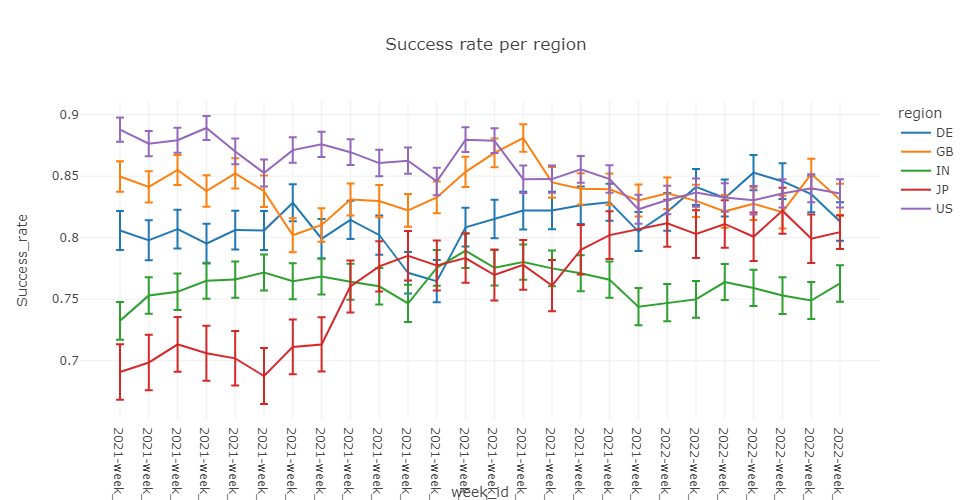

Produce the following requestser proportion graph:

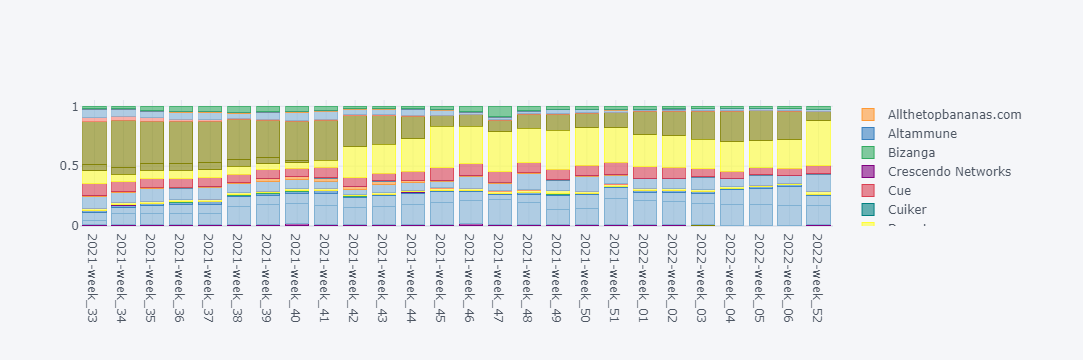

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)